<a href="https://colab.research.google.com/github/kacouokran/Map/blob/main/Map_cote_d'ivoire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Installer `rpy2` et le magic `%load_ext rpy2.ipython` (si ce n'est pas déjà fait)

In [ ]:
pip install rpy2

ERROR: Error in parse(text = input): <text>:1:5: unexpected symbol
1: pip install
        ^


### 2. Charger les bibliothèques R nécessaires

Nous aurons besoin de `sf` pour la manipulation des données spatiales et `ggplot2` pour la visualisation.

In [ ]:
install.packages("sf")
install.packages("ggplot2")
library(sf)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Linking to GEOS 3.12.1, GDAL 3.8.4, PROJ 9.3.1; sf_use_s2() is TRUE



### 3. Charger les données géographiques de la Côte d'Ivoire

**Important :** Vous devrez télécharger ou fournir le fichier de forme (shapefile) des limites administratives de la Côte d'Ivoire ou de la région du Haut Sassandra. Pour cet exemple, je vais supposer que vous avez un fichier `civ_admin_boundaries.shp` contenant les polygones des régions ou départements de la Côte d'Ivoire.

Vous pouvez télécharger ces types de données sur des sites comme [GADM](https://gadm.org/download_country.html) ou [OpenStreetMap](https://www.openstreetmap.org/). Assurez-vous de décompresser le fichier ZIP et de placer le fichier `.shp` (et les fichiers associés comme `.shx`, `.dbf`, etc.) dans un dossier accessible par Colab (par exemple, dans le même répertoire que votre notebook ou en le montant depuis Google Drive).

### 3.1. Lister les couches disponibles dans le GeoPackage

In [ ]:
# Lister toutes les couches disponibles dans le fichier GeoPackage
# Cela nous aidera à identifier la couche contenant les régions (par exemple, ADM_ADM_1 ou ADM_ADM_2)
layers_info <- st_layers(shapefile_path)
print(layers_info$name)

[1] "ADM_ADM_0" "ADM_ADM_1" "ADM_ADM_2" "ADM_ADM_3" "ADM_ADM_4"


In [ ]:
# Chemin vers votre fichier GeoPackage
# Ce fichier a été fourni par l'utilisateur : /content/gadm41_CIV.gpkg
shapefile_path <- "/content/gadm41_CIV.gpkg"

# Charger les données spatiales de la couche ADM_ADM_1 (les régions)
data_civ <- st_read(shapefile_path, layer = "ADM_ADM_1")

# Afficher les premières lignes des données pour inspecter les noms de colonnes
print(head(data_civ))

Reading layer `ADM_ADM_1' from data source `/content/gadm41_CIV.gpkg' using driver `GPKG'
Simple feature collection with 14 features and 11 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -8.599302 ymin: 4.361807 xmax: -2.494888 ymax: 10.73664
Geodetic CRS:  WGS 84
Simple feature collection with 6 features and 11 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -8.166845 ymin: 4.361807 xmax: -2.720592 ymax: 10.48812
Geodetic CRS:  WGS 84
    GID_1 GID_0       COUNTRY        NAME_1 VARNAME_1 NL_NAME_1
1 CIV.1_1   CIV Côte d'Ivoire       Abidjan        NA        NA
2 CIV.2_1   CIV Côte d'Ivoire Bas-Sassandra        NA        NA
3 CIV.3_1   CIV Côte d'Ivoire         Comoé        NA        NA
4 CIV.4_1   CIV Côte d'Ivoire      Denguélé        NA        NA
5 CIV.5_1   CIV Côte d'Ivoire   Gôh-Djiboua        NA        NA
6 CIV.6_1   CIV Côte d'Ivoire          Lacs        NA        NA
             TYPE_1           ENGTYPE_1 CC_1 HASC_1 ISO_1
1

### 4. Filtrer pour la région du Haut Sassandra

Une fois les données chargées, vous devrez identifier la colonne qui contient les noms des régions ou départements et filtrer pour `Haut Sassandra`. La colonne exacte peut varier en fonction de votre source de données (par exemple, `NAME_1`, `NAME_2`, `NOM_REGION`, etc.).

Dans l'exemple ci-dessous, je suppose qu'une colonne `NOM_REGION` contient le nom de la région.

In [ ]:
# Remplacez 'NOM_REGION' par le nom de la colonne appropriée dans votre shapefile
# et ajustez la valeur 'Haut-Sassandra' si elle est écrite différemment dans vos données.

haut_sassandra_data <- data_civ[data_civ$NAME_1 == "Sassandra-Marahoué", ]

# Vérifier si la région a été trouvée
if (nrow(haut_sassandra_data) == 0) {
  cat("La région 'Sassandra-Marahoué' n'a pas été trouvée. Veuillez vérifier le nom de la colonne et la valeur dans vos données.\n")
  print(unique(data_civ$NAME_1)) # Affiche tous les noms de régions disponibles pour aider au débogage
} else {
  print(paste("Région de Sassandra-Marahoué trouvée avec", nrow(haut_sassandra_data), "polygones."))
}

[1] "Région de Sassandra-Marahoué trouvée avec 1 polygones."


### 5. Tracer la carte

Enfin, nous pouvons utiliser `ggplot2` pour tracer la carte de la région du Haut Sassandra.

In [ ]:
%load_ext rpy2.ipython

ERROR: Error in parse(text = input): <text>:1:1: unexpected input
1: %load_ext rpy2.ipython
    ^


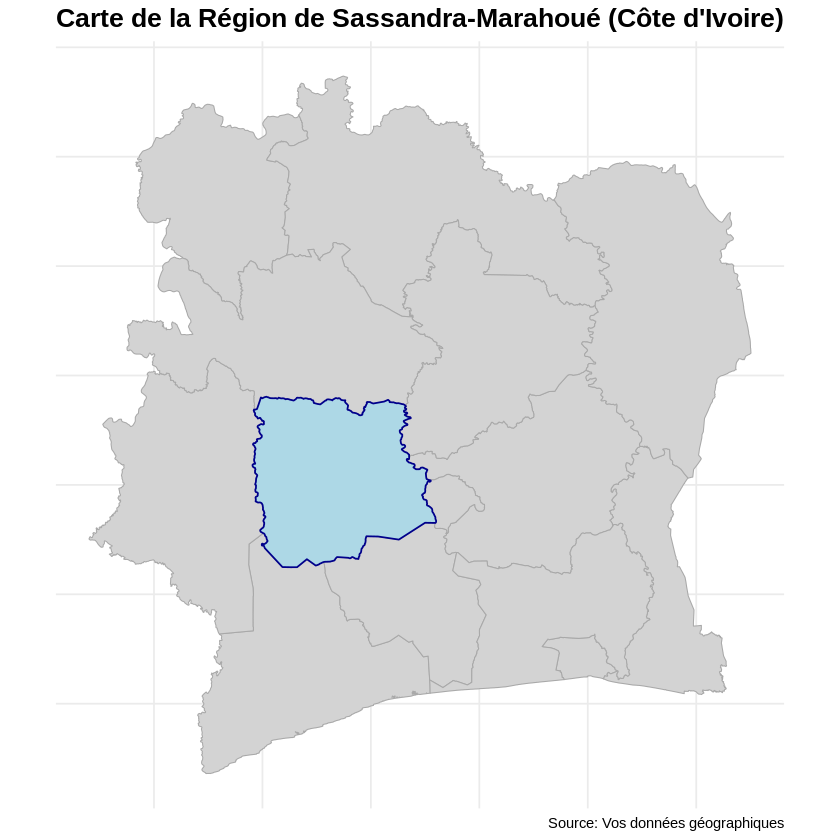

In [ ]:
if (exists("haut_sassandra_data") && nrow(haut_sassandra_data) > 0) {
  ggplot() +
    # Dessiner la carte de toute la Côte d'Ivoire en arrière-plan
    geom_sf(data = data_civ, fill = "lightgrey", color = "darkgrey", lwd = 0.3) +
    # Dessiner la région de Sassandra-Marahoué par-dessus pour la mettre en évidence
    geom_sf(data = haut_sassandra_data, fill = "lightblue", color = "darkblue", lwd = 0.5) +
    labs(
      title = "Carte de la Région de Sassandra-Marahoué (Côte d'Ivoire)",
      caption = "Source: Vos données géographiques"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      axis.title.x = element_blank(), # Masquer le titre de l'axe X
      axis.text.x = element_blank(),  # Masquer les étiquettes de l'axe X
      axis.ticks.x = element_blank(), # Masquer les tiques de l'axe X
      axis.title.y = element_blank(), # Masquer le titre de l'axe Y
      axis.text.y = element_blank(),  # Masquer les étiquettes de l'axe Y
      axis.ticks.y = element_blank()  # Masquer les tiques de l'axe Y
    )
} else {
  cat("Impossible de tracer la carte : les données de Sassandra-Marahoué sont introuvables ou vides.\n")
}

### 10. Lister les villes dans le département du Haut-Sassandra

In [ ]:
# Sélectionner les villes qui sont spatialement dans le département du Haut-Sassandra
villes_haut_sassandra <- st_filter(data_villes, haut_sassandra_departement)

# Vérifier si des villes ont été trouvées
if (nrow(villes_haut_sassandra) == 0) {
  cat("Aucune ville trouvée dans le département du Haut-Sassandra à partir de la couche ADM_ADM_3.\n")
} else {
  cat("Noms des villes dans le département du Haut-Sassandra (colonne NAME_3) :\n")
  print(unique(villes_haut_sassandra$NAME_3))
}

Noms des villes dans le département du Haut-Sassandra (colonne NAME_3) :
 [1] "Buyo"       "Soubré"     "Gagnoa"     "Bangolo"    "Duékoué"   
 [6] "Facobly"    "Kouibly"    "Daloa"      "Issia"      "Vavoua"    
[11] "Zoukougbeu" "Bouaflé"    "Sinfra"     "Zuénoula"   "Kounahiri" 
[16] "Mankono"    "Séguéla"   


### 11. Tracer la carte du département du Haut-Sassandra avec ses villes

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”
Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


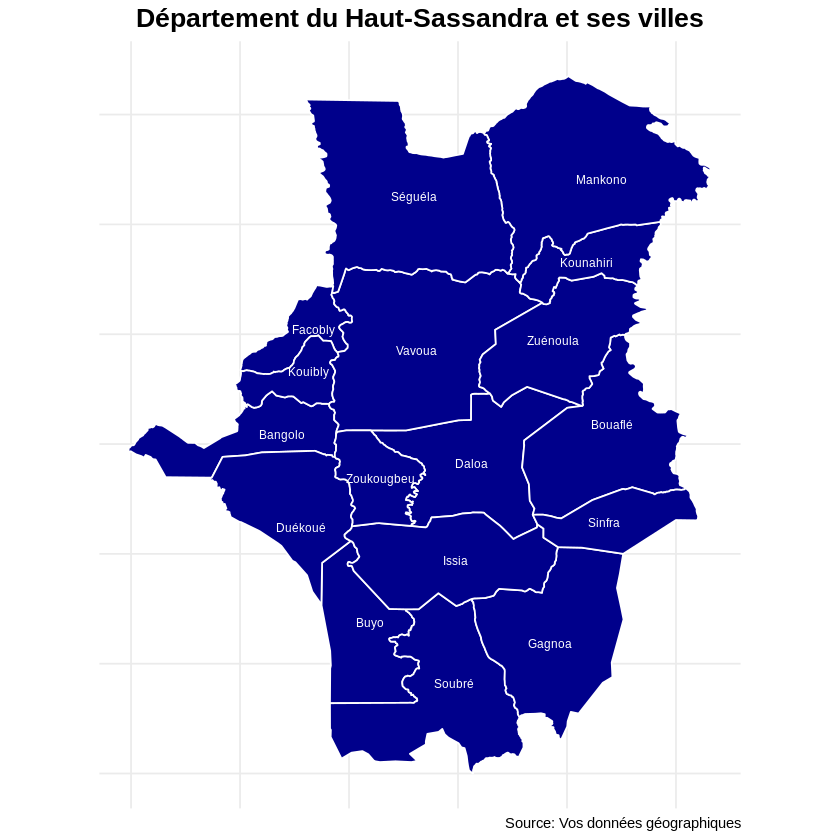

In [ ]:
if (exists("haut_sassandra_departement") && nrow(haut_sassandra_departement) > 0) {
  ggplot() +
    # Dessiner le département du Haut-Sassandra
    geom_sf(data = haut_sassandra_departement, fill = "lightcoral", color = "darkred", lwd = 0.5) +
    geom_sf_text(data = haut_sassandra_departement, aes(label = NAME_2), size = 3, colour = "black", check_overlap = TRUE) +
    # Dessiner les villes à l'intérieur du département
    geom_sf(data = villes_haut_sassandra, fill = "darkblue", color = "white", size = 0.5) +
    geom_sf_text(data = villes_haut_sassandra, aes(label = NAME_3), size = 2.5, colour = "white", check_overlap = TRUE) +
    labs(
      title = "Département du Haut-Sassandra et ses villes",
      caption = "Source: Vos données géographiques"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      axis.title.x = element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank()
    )
} else {
  cat("Impossible de tracer la carte : les données du département du Haut-Sassandra sont introuvables ou vides.\n")
}

### 9. Lister les villes/subdivisions de niveau ADM_ADM_3

In [ ]:
# Charger les données spatiales de la couche ADM_ADM_3 (les villes/subdivisions)
data_villes <- st_read(shapefile_path, layer = "ADM_ADM_3")

# Afficher les premières lignes pour inspecter les noms de colonnes et identifier la colonne des villes
print(head(data_villes))

# Afficher les noms uniques des villes (en supposant que 'NAME_3' est la colonne)
cat("\nNoms uniques des villes/subdivisions (colonne NAME_3) :\n")
print(unique(data_villes$NAME_3))

Reading layer `ADM_ADM_3' from data source `/content/gadm41_CIV.gpkg' using driver `GPKG'
Simple feature collection with 113 features and 16 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -8.599302 ymin: 4.361807 xmax: -2.494888 ymax: 10.73664
Geodetic CRS:  WGS 84
Simple feature collection with 6 features and 16 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -7.126841 ymin: 4.849861 xmax: -3.721849 ymax: 6.558353
Geodetic CRS:  WGS 84
        GID_3 GID_0       COUNTRY   GID_1        NAME_1 NL_NAME_1     GID_2
1 CIV.1.1.1_1   CIV Côte d'Ivoire CIV.1_1       Abidjan        NA CIV.1.1_1
2 CIV.2.1.1_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sassandra        NA CIV.2.1_1
3 CIV.2.1.2_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sassandra        NA CIV.2.1_1
4 CIV.2.2.1_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sassandra        NA CIV.2.2_1
5 CIV.2.2.2_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sassandra        NA CIV.2.2_1
6 CIV.2.2.3_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sass

### 8. Cibler et tracer le département du Haut-Sassandra

In [ ]:
# Filtrer les données pour le département du Haut-Sassandra
haut_sassandra_departement <- data_departements[data_departements$NAME_2 == "Haut-Sassandra", ]

# Vérifier si le département a été trouvé
if (nrow(haut_sassandra_departement) == 0) {
  cat("Le département 'Haut-Sassandra' n'a pas été trouvé dans la couche ADM_ADM_2. Veuillez vérifier le nom.")
  print(unique(data_departements$NAME_2)) # Afficher les noms disponibles pour déboguer
} else {
  print(paste("Département 'Haut-Sassandra' trouvé avec", nrow(haut_sassandra_departement), "polygone(s)."))
}

[1] "Département 'Haut-Sassandra' trouvé avec 1 polygone(s)."


Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


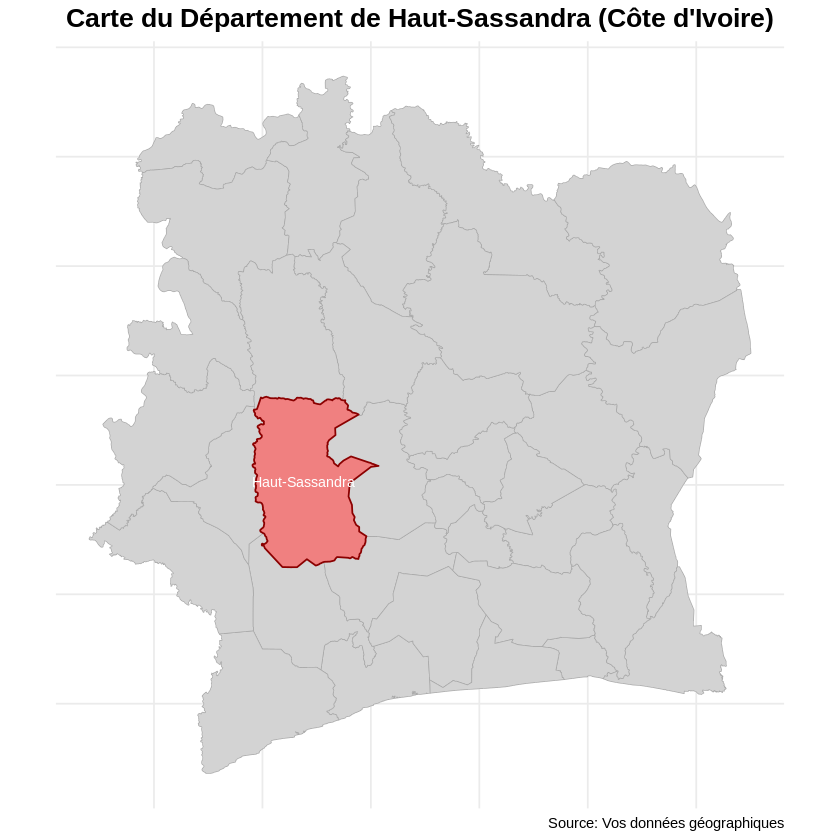

In [ ]:
if (exists("haut_sassandra_departement") && nrow(haut_sassandra_departement) > 0) {
  ggplot() +
    # Dessiner tous les départements en arrière-plan (optionnel, pour le contexte)
    geom_sf(data = data_departements, fill = "lightgrey", color = "darkgrey", lwd = 0.2) +
    # Dessiner le département du Haut-Sassandra pour le mettre en évidence
    geom_sf(data = haut_sassandra_departement, fill = "lightcoral", color = "darkred", lwd = 0.5) +
    geom_sf_text(data = haut_sassandra_departement, aes(label = NAME_2), size = 3, colour = "white") +
    labs(
      title = "Carte du Département de Haut-Sassandra (Côte d'Ivoire)",
      caption = "Source: Vos données géographiques"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      axis.title.x = element_blank(),
      axis.text.x = element_blank(),
      axis.ticks.x = element_blank(),
      axis.title.y = element_blank(),
      axis.text.y = element_blank(),
      axis.ticks.y = element_blank()
    )
} else {
  cat("Impossible de tracer la carte : les données du département du Haut-Sassandra sont introuvables ou vides.\n")
}

### 7. Tracer la carte des départements

Warning message in st_point_on_surface.sfc(sf::st_zm(x)):
“st_point_on_surface may not give correct results for longitude/latitude data”


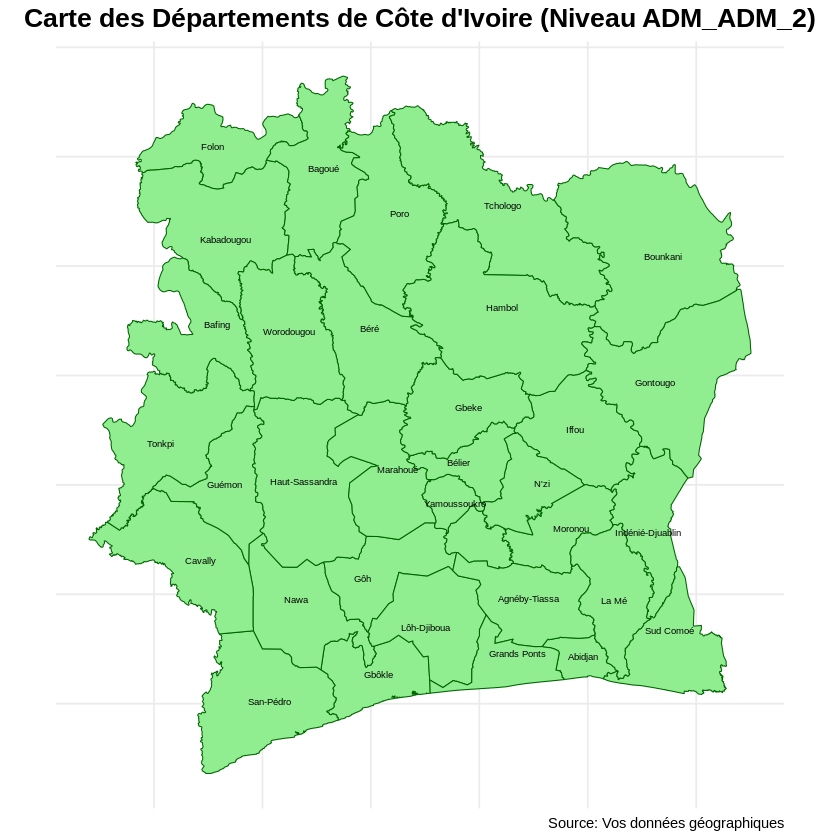

In [ ]:
if (exists("data_departements") && nrow(data_departements) > 0) {
  ggplot(data = data_departements) +
    geom_sf(fill = "lightgreen", color = "darkgreen", lwd = 0.3) +
    geom_sf_text(aes(label = NAME_2), size = 2, colour = "black", check_overlap = TRUE) + # Ajouter les noms des départements
    labs(
      title = "Carte des Départements de Côte d'Ivoire (Niveau ADM_ADM_2)",
      caption = "Source: Vos données géographiques"
    ) +
    theme_minimal() +
    theme(
      plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
      axis.title.x = element_blank(), # Masquer le titre de l'axe X
      axis.text.x = element_blank(),  # Masquer les étiquettes de l'axe X
      axis.ticks.x = element_blank(), # Masquer les tiques de l'axe X
      axis.title.y = element_blank(), # Masquer le titre de l'axe Y
      axis.text.y = element_blank(),  # Masquer les étiquettes de l'axe Y
      axis.ticks.y = element_blank()  # Masquer les tiques de l'axe Y
    )
} else {
  cat("Impossible de tracer la carte : les données des départements sont introuvables ou vides.\n")
}

### 6. Lister les départements

In [ ]:
# Charger les données spatiales de la couche ADM_ADM_2 (les départements)
data_departements <- st_read(shapefile_path, layer = "ADM_ADM_2")

# Afficher les premières lignes pour inspecter les noms de colonnes et identifier la colonne des départements
print(head(data_departements))

# Afficher les noms uniques des départements (en supposant que 'NAME_2' est la colonne)
cat("\nNoms uniques des départements (colonne NAME_2) :\n")
print(unique(data_departements$NAME_2))

Reading layer `ADM_ADM_2' from data source `/content/gadm41_CIV.gpkg' using driver `GPKG'
Simple feature collection with 33 features and 13 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -8.599302 ymin: 4.361807 xmax: -2.494888 ymax: 10.73664
Geodetic CRS:  WGS 84
Simple feature collection with 6 features and 13 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -7.596899 ymin: 4.361807 xmax: -2.720592 ymax: 7.354768
Geodetic CRS:  WGS 84
      GID_2 GID_0       COUNTRY   GID_1        NAME_1 NL_NAME_1
1 CIV.1.1_1   CIV Côte d'Ivoire CIV.1_1       Abidjan        NA
2 CIV.2.1_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sassandra        NA
3 CIV.2.2_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sassandra        NA
4 CIV.2.3_1   CIV Côte d'Ivoire CIV.2_1 Bas-Sassandra        NA
5 CIV.3.1_1   CIV Côte d'Ivoire CIV.3_1         Comoé        NA
6 CIV.3.2_1   CIV Côte d'Ivoire CIV.3_1         Comoé        NA
            NAME_2 VARNAME_2 NL_NAME_2            TYPE_2   